In [3]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [7]:
all_files = glob.glob('wcloud_data/myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['wcloud_data\\myCabinetExcelData (1).xls',
 'wcloud_data\\myCabinetExcelData (2).xls',
 'wcloud_data\\myCabinetExcelData (3).xls',
 'wcloud_data\\myCabinetExcelData (4).xls',
 'wcloud_data\\myCabinetExcelData (5).xls',
 'wcloud_data\\myCabinetExcelData (6).xls',
 'wcloud_data\\myCabinetExcelData (7).xls',
 'wcloud_data\\myCabinetExcelData (8).xls',
 'wcloud_data\\myCabinetExcelData.xls']

In [11]:
all_files_data = [] #저장할 리스트 
for file in all_files: 
    data_frame = pd.read_excel(file)  
    all_files_data.append(data_frame) 

all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [13]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
895,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
896,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
897,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
898,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [14]:
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
895    Guest Editorial: Big Media Data: Understanding...
896    Guest Editorial: Big Scholar Data Discovery an...
897    Guest Editorial: Big Media Data: Understanding...
898    Speed Up Big Data Analytics by Unveiling the S...
899          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 900, dtype: object

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [29]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [30]:
words = [] 

for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]  
    words.append(EnWordsTokenStopLemma)

In [31]:
words2 = list(reduce(lambda x,y : x+y , words))
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

In [32]:
count = Counter(words2)
count

Counter({'guest': 11,
         'editorial': 15,
         'big': 1225,
         'medium': 10,
         'data': 1461,
         'understanding': 10,
         'search': 7,
         'mining': 35,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 123,
         'web': 9,
         'parallel': 3,
         'computing': 22,
         'preserving': 2,
         'privacy': 17,
         'using': 52,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 14,
         'nosql': 2,
         'database': 9,
         'computation': 2,
         'migration': 3,
         'new': 34,
         'approach': 38,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 10,
         'real': 13,
         'time': 15,
         'platform': 17,
         'health': 33,
         'application': 21,
         'accurate': 3,
         'distributed': 17,
         'cluster': 2,
         'analysis': 58,
         '

In [34]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

data : 1461
big : 1225
analytics : 123
analysis : 58
based : 53
using : 52
system : 43
science : 43
management : 42
challenge : 42
approach : 38
research : 36
mining : 35
new : 34
model : 34
health : 33
smart : 30
learning : 29
cloud : 28
opportunity : 28
processing : 26
small : 26
driven : 24
issue : 24
framework : 23
information : 23
computing : 22
quality : 22
application : 21
knowledge : 21
perspective : 21
technology : 21
use : 21
efficient : 20
review : 20
deal : 20
healthcare : 19
service : 19
survey : 19
process : 19
storage : 18
decision : 18
making : 18
business : 18
open : 18
privacy : 17
platform : 17
distributed : 17
large : 17
social : 17


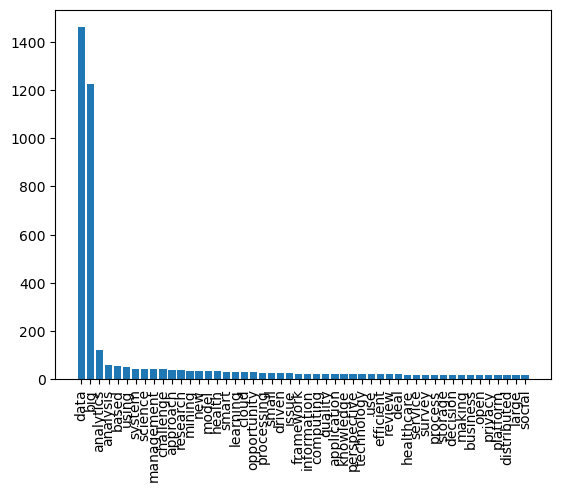

In [39]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

In [41]:
del word_count['data']
del word_count['big']

In [42]:
word_count

{'analytics': 123,
 'analysis': 58,
 'based': 53,
 'using': 52,
 'system': 43,
 'science': 43,
 'management': 42,
 'challenge': 42,
 'approach': 38,
 'research': 36,
 'mining': 35,
 'new': 34,
 'model': 34,
 'health': 33,
 'smart': 30,
 'learning': 29,
 'cloud': 28,
 'opportunity': 28,
 'processing': 26,
 'small': 26,
 'driven': 24,
 'issue': 24,
 'framework': 23,
 'information': 23,
 'computing': 22,
 'quality': 22,
 'application': 21,
 'knowledge': 21,
 'perspective': 21,
 'technology': 21,
 'use': 21,
 'efficient': 20,
 'review': 20,
 'deal': 20,
 'healthcare': 19,
 'service': 19,
 'survey': 19,
 'process': 19,
 'storage': 18,
 'decision': 18,
 'making': 18,
 'business': 18,
 'open': 18,
 'privacy': 17,
 'platform': 17,
 'distributed': 17,
 'large': 17,
 'social': 17}

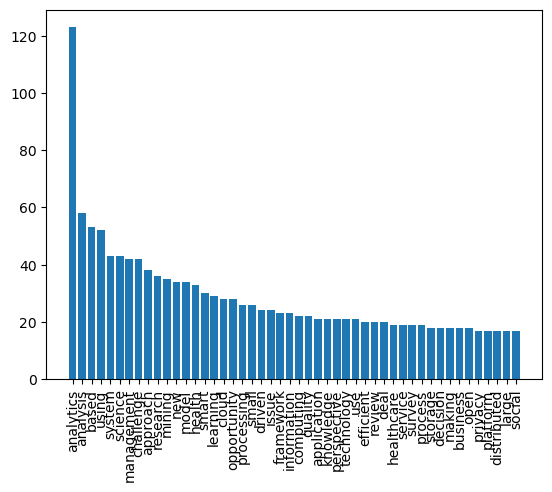

In [43]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

In [44]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,1
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


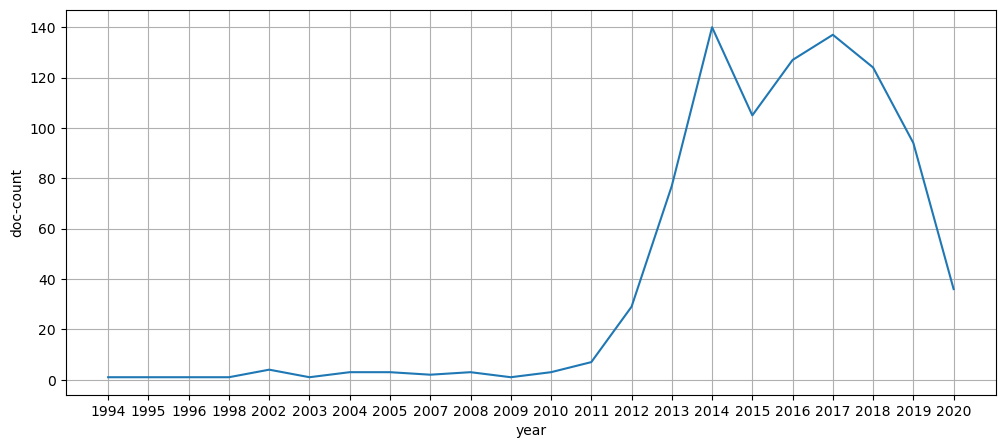

In [45]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

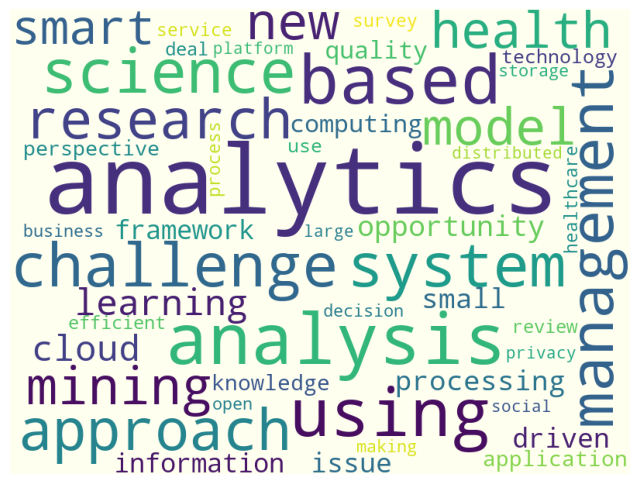

In [46]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize= (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()